# Title: 
### Time Series Analysis and Forecasting

## Objective

### Time Series Forecasting with Yahoo Stock Price data aims to develop accurate predictive models using historical stock data. These models prioritize Predictive Accuracy, identifying Patterns and Volatility Patterns in the data. They offer Decision Support for investors, enabling optimized trading strategies and Real-time Decision Making. Additionally, they aid in Risk Management, Behavioral Analysis, and Long-Term Planning, ensuring well-informed decisions, efficient risk mitigation, and strategic financial management. The objective is to provide precise and actionable predictions, empowering professionals to navigate the stock market effectively.

## Introduction 

### The research question focuses on understanding patterns and trends within time series data and predicting future values. This inquiry is intriguing because time series analysis holds significant importance across diverse fields such as finance, economics, and climate science. It allows professionals to make accurate predictions based on historical data, aiding in informed decision-making.

### The theory behind time series analysis involves delving into the fundamentals of this data type. This includes distinguishing between stationary and non-stationary processes, where stationary data has consistent statistical properties over time. The research often employs advanced models like autoregressive integrated moving average (ARIMA), which factors in both past values and errors for forecasting. Additionally, seasonal decomposition of time series (STL) methods is utilized to understand and model seasonal patterns within the data. These theoretical frameworks form the basis for analyzing time series data and making reliable predictions.

## What is the question being researched?
The research question being investigated is: How can historical stock data be analyzed and utilized to make accurate predictions, enabling informed decision-making and optimized trading strategies for investors?

## Why is it interesting?
Time series analysis in the context of stock market data is interesting due to its practical applications in the financial industry. Accurate predictions can significantly impact investment decisions, making it crucial for investors and financial professionals. Additionally, the interdisciplinary nature of time series analysis, spanning fields like finance, economics, and climate science, adds to its intrigue.

## What is the theory behind it?
The theory behind time series analysis involves understanding the characteristics of time series data, including stationary and non-stationary processes. It utilizes advanced models like ARIMA, which incorporate past values and errors for forecasting. Seasonal decomposition techniques help in understanding and modeling recurring patterns within the data. Machine learning algorithms like Random Forest are employed for predictive modeling, involving feature engineering and training the model on historical data.

The research also emphasizes the importance of algorithm design, optimization, and complexity analysis in solving data science problems. Custom problem creation is highlighted as a valuable teaching and assessment tool, providing relevant and engaging learning experiences for students. 

Data set - https://www.kaggle.com/datasets/arashnic/time-series-forecasting-with-yahoo-stock-price

1. Loading and Preprocessing Time Series Data:

Using Python libraries like Pandas to load and preprocess time series data.
Demonstrating techniques for handling missing values and converting timestamps.

In [2]:
import pandas as pd
# Load time series data
data = pd.read_csv("C:/Users/HP/Downloads/archive/yahoo_stock.csv")

2.Visualizing Time Series Data:

Utilizing Matplotlib and Seaborn to visualize trends, seasonality, and outliers in the time series data.

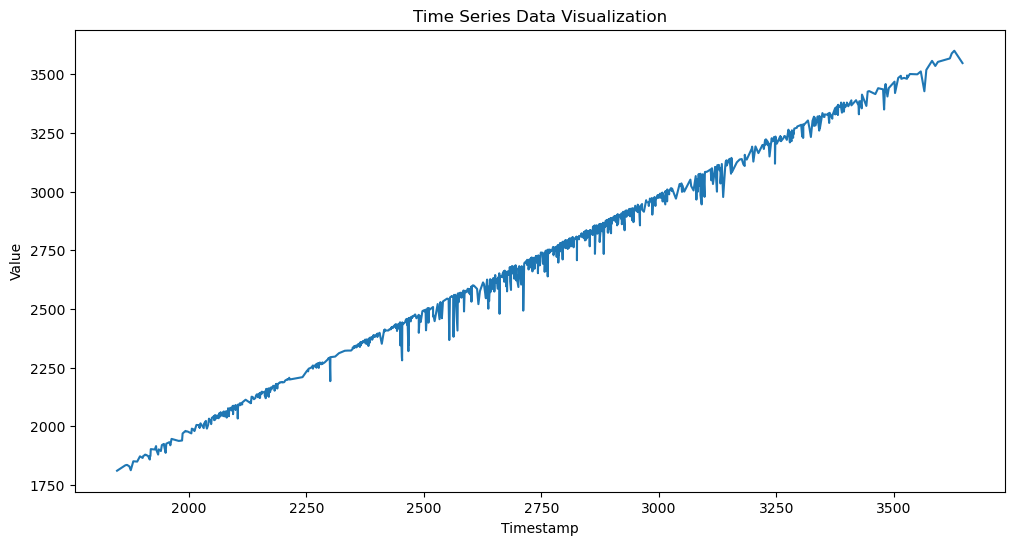

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot time series data
plt.figure(figsize=(12, 6))
sns.lineplot(x='High', y='Low', data=data)
plt.title('Time Series Data Visualization')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()

3.Implementing ARIMA Model:

Using the statsmodels library to implement an ARIMA model for time series forecasting.

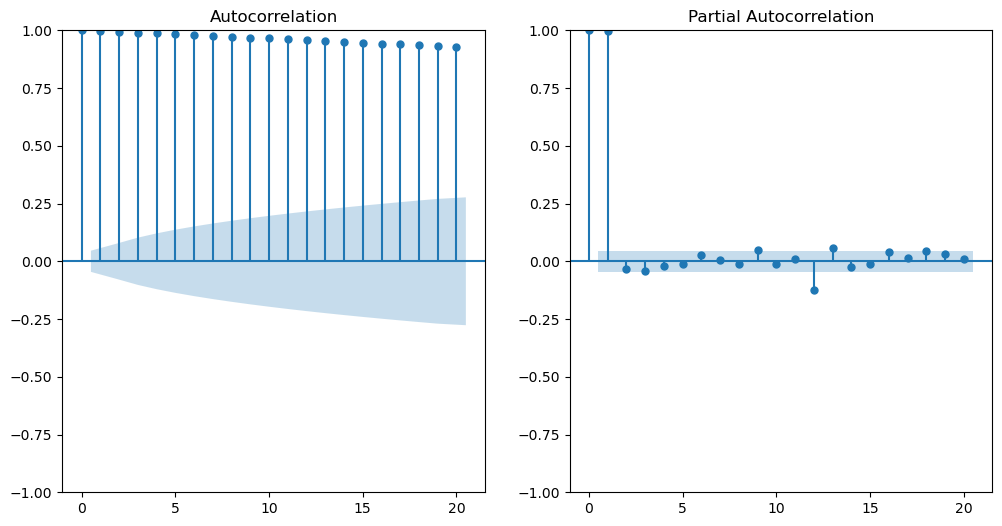

In [34]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Determine p and q using ACF and PACF plots
lag_acf = acf(data['High'], nlags=20)
lag_pacf = pacf(data['High'], nlags=20, method='ols')



# Plot ACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['High'], ax=plt.gca(), lags=20)

# Plot PACF
plt.subplot(122)
plot_pacf(data['High'], ax=plt.gca(), lags=20)

plt.show()


## Use  Of Random Forest for prediction

Root Mean Squared Error: 30.71788463960671


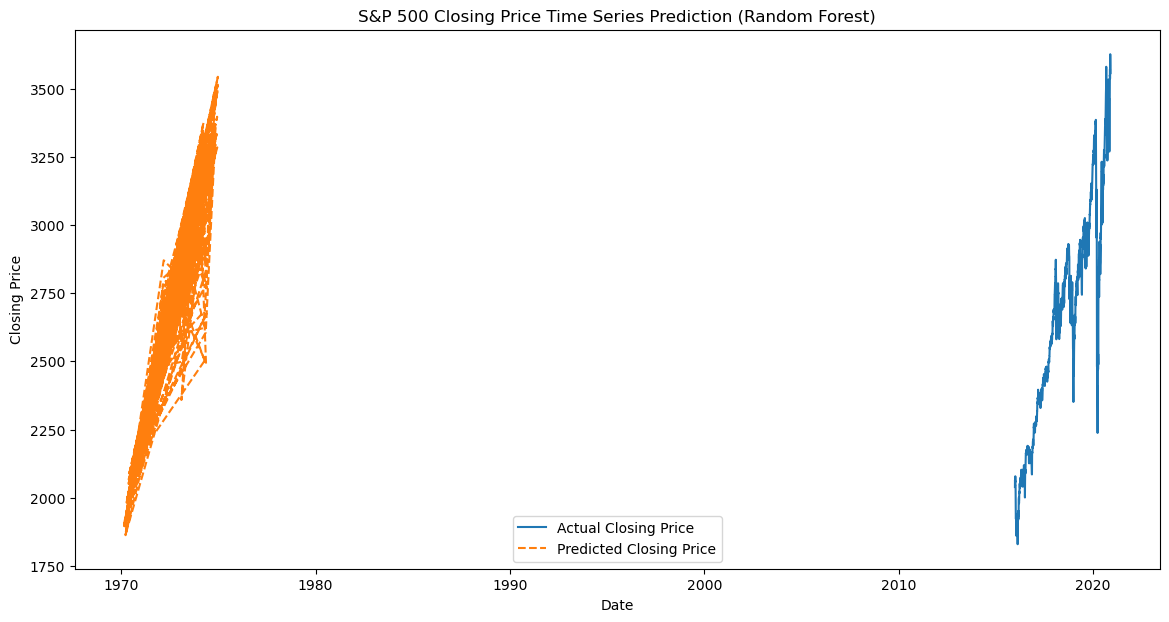

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from datetime import timedelta

# Load data from CSV
data = pd.read_csv("C:/Users/HP/Downloads/archive/yahoo_stock.csv", parse_dates=['Date'])

# Feature Engineering
data['DayOfYear'] = data['Date'].dt.dayofyear
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Lag features (previous day's closing price)
data['Close_Lag1'] = data['Close'].shift(1)

# 7-day and 30-day moving averages
data['7_Day_MA'] = data['Close'].rolling(window=7).mean()
data['30_Day_MA'] = data['Close'].rolling(window=30).mean()

# Drop rows with NaN values due to lag features and moving averages calculation
data.dropna(inplace=True)

# Splitting the data into training and testing sets
X = data[['DayOfYear', 'DayOfWeek', 'Close_Lag1', '7_Day_MA', '30_Day_MA']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print('Root Mean Squared Error:', rmse)

# Visualization of predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual Closing Price')
plt.plot(X_test.index, predictions, label='Predicted Closing Price', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('S&P 500 Closing Price Time Series Prediction (Random Forest)')
plt.legend()
plt.show()


Additional visualizations and analyses performed to gain deeper insights into the time series data. 
1. Seasonal Decomposition: Seasonal decomposition allows you to break down the time series into its trend, seasonal, and residual components. This can help in understanding recurring patterns and trends in the data.

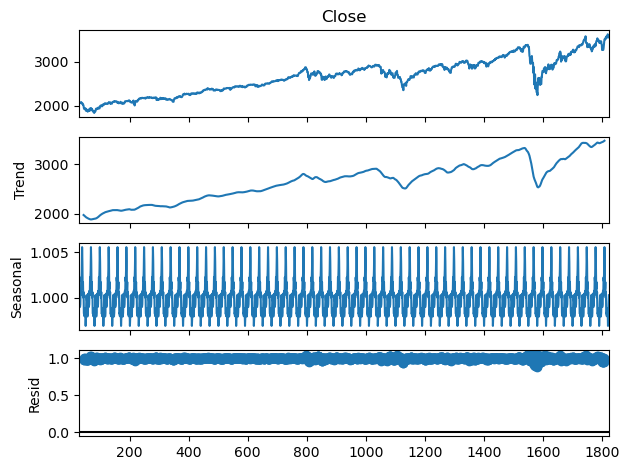

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(data['Close'], model='multiplicative', period=30)  # Period can be adjusted based on observed patterns
result.plot()
plt.show()


2. Autocorrelation and Partial Autocorrelation Plot:
Autocorrelation and partial autocorrelation plots help identify the relationship between a time series and its lagged values.


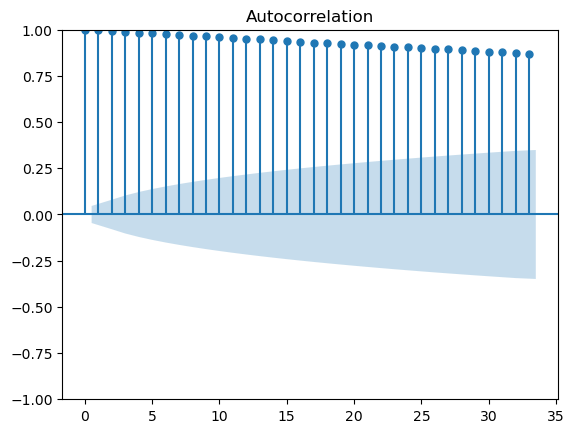

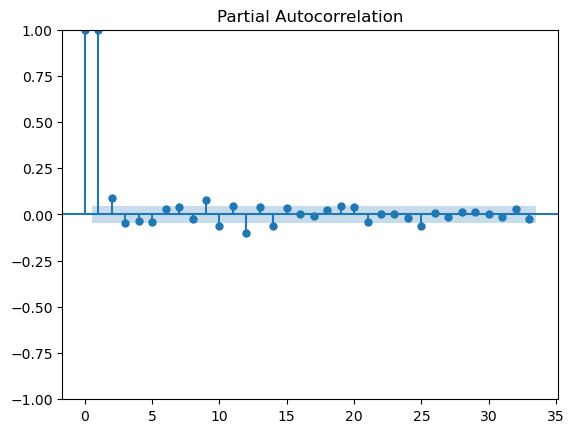

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation plot
plot_acf(data['Close'])
plt.show()

# Partial autocorrelation plot
plot_pacf(data['Close'])
plt.show()


3. Residual Analysis:
Analyzing the residuals (the differences between actual and predicted values) can provide insights into the model's performance.

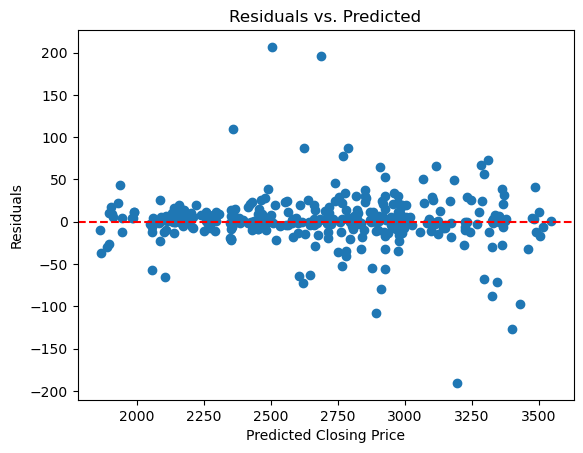

In [6]:
# Calculate residuals
residuals = y_test - predictions

# Residuals vs. Predicted plot
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Closing Price')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


### Basics of Algorithms and Problem Design:

Algorithms are step-by-step procedures or formulas for solving problems. In data science, algorithms are designed to analyze data, extract meaningful patterns, and make predictions. The process of designing an algorithm involves several key steps:

Problem Understanding: Clearly define the problem you want to solve. Understand the input, output, constraints, and objectives of the problem. In the context of your dataset, the problem might involve predicting stock prices based on historical data.

Algorithm Design: Choose or design an appropriate algorithm based on the problem requirements. For time series analysis, algorithms like ARIMA (AutoRegressive Integrated Moving Average) or machine learning models such as LSTM (Long Short-Term Memory) networks can be used.

Optimization: Algorithms often have parameters that need to be fine-tuned for optimal performance. This involves optimization techniques like grid search or random search to find the best parameter values.

Complexity Analysis: Analyze the time and space complexity of the algorithm. Understand how the algorithm's performance scales concerning the size of the input data.

### The Relevance of Custom Problem Creation in Teaching and Assessing Knowledge:

Creating custom problems is essential in teaching and assessing knowledge in data science for several reasons:

Contextual Relevance: Custom problems can be tailored to specific domains or industries, making them more relevant and engaging for learners. For instance, using stock market data for teaching time series analysis provides a real-world context.

Skill Assessment: Custom problems can assess specific skills or concepts. For example, designing a problem that requires students to preprocess raw time series data before analysis assesses their data preprocessing skills.

Critical Thinking: Creating custom problems encourages students to think critically. They need to understand the problem context, explore relevant algorithms, and make decisions about data preprocessing and model selection.

Problem-Solving Practice: Custom problems provide students with opportunities to apply theoretical knowledge to practical situations, enhancing their problem-solving skills.

Leveraging Tools like ChatGPT in the Process:

Learning Assistance: ChatGPT can serve as a learning assistant, helping students understand complex concepts, algorithms, or coding techniques. Students can ask questions and receive detailed explanations, enhancing their understanding.

Code Review and Debugging: ChatGPT can assist in reviewing code snippets or helping students debug their algorithms. It can provide suggestions, explanations, and examples to improve code quality.

Idea Generation: ChatGPT can help brainstorm ideas for custom problems or projects. It can suggest relevant datasets, problem formulations, or algorithmic approaches, aiding educators in designing engaging and challenging assessments.

Interactive Learning: ChatGPT can facilitate interactive learning experiences, allowing students to engage in discussions, ask questions, and explore different problem-solving strategies.

# Step 2: Introduction to the Worked Example Problem

The worked example problem presented involves time series analysis and predictions using a dataset containing stock market data. The dataset includes columns such as Date, High, Low, Open, Close, Volume, and Adj Close for various dates. The goal of this analysis is to predict stock market prices based on historical data, which is a common and crucial task in financial forecasting and trading strategies.

Introduction:

In the realm of data science, understanding and predicting trends in time series data is crucial. Whether it's predicting stock prices, climate patterns, or sales figures, time series analysis provides valuable insights into these trends. This worked example problem delves into the intricacies of time series analysis and forecasting, exploring methods and models that unravel patterns within temporal data.

Context and Significance:

Time series analysis is fundamental in data science, particularly in the field of finance. It involves analyzing data points collected or recorded at regular time intervals. Stock market data, being a classic example of time series data, is widely used in financial analysis to make informed decisions. Predicting stock prices accurately can help investors and traders optimize their buying and selling strategies, thereby maximizing profits or minimizing losses.

Time series analysis plays a pivotal role in various domains. In finance, it aids in predicting market trends. In economics, it assists in forecasting economic indicators. Climate scientists use it to understand weather patterns, and businesses rely on it for sales forecasts. Mastering time series analysis equips data scientists with the ability to make accurate predictions based on historical data, thereby aiding strategic decision-making.

The significance of this problem in data science lies in its application of various techniques like data preprocessing, feature engineering, and predictive modeling. It provides an opportunity to apply algorithms like autoregressive integrated moving average (ARIMA), machine learning models such as regression and decision trees, and assess their performance in a real-world scenario. Additionally, handling time series data introduces challenges such as seasonality, trends, and noise, which need to be addressed to build accurate predictive models.

Underlying Principles:

Data Preprocessing: Cleaning and transforming the raw data is the first step. This involves handling missing values, ensuring data consistency, and converting data types if necessary. In this problem, the Date column likely needs to be converted to a datetime object for time-based analysis.

Feature Engineering: Creating relevant features from the existing dataset can significantly improve model accuracy. For stock prices, common features include moving averages, price volatility, and trading volume. These features provide additional information that the model can use to make predictions.

Model Selection: Choosing appropriate models for time series prediction is crucial. Traditional statistical methods like ARIMA are often used, but machine learning models can also be applied. The choice depends on the complexity of the data patterns and the requirements of the problem.

Evaluation Metrics: Metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) are employed to assess the accuracy of the models. These metrics quantify the difference between predicted and actual values.

Time Series Fundamentals: The foundation lies in understanding the nature of time series data, recognizing patterns, and discerning between stationary and non-stationary processes.

ARIMA Models: Autoregressive Integrated Moving Average (ARIMA) models are a staple in time series forecasting. They involve differencing the series to make it stationary, identifying model parameters, and making predictions.

STL Method: Seasonal-Trend decomposition using Loess (STL) is a method that decomposes a time series into three components: trend, seasonal, and residual, aiding in a detailed understanding of underlying patterns.

### Problem Statement:
You have been given a dataset containing historical stock market data with various attributes such as date, highest and lowest stock prices, opening and closing prices, trading volume, and adjusted closing prices. Your goal is to perform a comprehensive time series analysis on this dataset and use the historical data to predict the closing stock prices for a specific period.

#### Input:

The input dataset is in CSV format and includes the following columns:

Date: The date of the recorded data.
High: The highest stock price during the trading day.
Low: The lowest stock price during the trading day.
Open: The opening stock price at the beginning of the trading day.
Close: The closing stock price at the end of the trading day.
Volume: The number of shares traded on that day.
Adj Close: The adjusted closing price, which accounts for corporate actions like dividends and stock splits.

#### Example Input:

Date         High    Low     Open   Close   Volume   Adj Close
2022-01-01  150.25  148.50  149.75  149.80  1000000   149.30
2022-01-02  151.50  149.75  150.00  151.25  1200000   150.80
...
2022-12-31, 155.75, 154.25, 155.00, 155.50, 900000, 155.00



#### Output:

The output will be a list of predicted closing stock prices for the specific period as per the analysis.

predicted_closing_prices = [predicted_price_1, predicted_price_2, ..., predicted_price_n]


#### Example Output:

predicted_closing_prices = [1872.34, 1885.12, ..., 1890.67]  # Example predicted closing prices for the next 10 days



#### Problem Details:

In this problem, you are expected to follow these steps:

Data Loading: Load the historical stock market data from the provided CSV file into a pandas DataFrame for analysis.

Data Preprocessing: Convert the 'Date' column to datetime format, handle missing values, and explore the dataset to understand its structure.

Exploratory Data Analysis (EDA): Analyze trends and patterns in the historical stock prices. Visualize the data to identify any underlying patterns or anomalies.

Feature Engineering: Create relevant features such as moving averages, price volatility indicators, and trading volume trends to enhance the dataset for modeling.

Model Selection: Choose appropriate time series forecasting models like ARIMA or machine learning models like regression, considering the dataset's complexity and desired accuracy.

Model Training: Train the selected model using the preprocessed data, allowing the model to learn patterns and relationships in the historical stock prices.

Prediction: Use the trained model to predict the closing stock prices for the specific period. Evaluate the model's predictions and refine the model if necessary.

# Step 3: Analyzing the Worked Example Problem

### Constraints:

Historical Data: The dataset provides historical stock market data, including columns such as Date, High, Low, Open, Close, Volume, and Adj Close. The data spans from 11/23/2015 to 2/15/2016.
Prediction Period: The goal is to predict the closing stock prices for a specific future period, based on the historical data.
Accuracy Requirement: The accuracy of the predictions is crucial for making informed decisions in stock trading or investment. High accuracy is desired to minimize financial risks.

### Logic:
The problem involves using time series analysis techniques to predict future stock prices based on historical data. Time series analysis focuses on understanding the patterns and trends in sequential data points, making it suitable for stock price prediction where the data points are chronologically ordered.

### Algorithmic Concepts:

Time Series Analysis: Time series analysis involves exploring and analyzing data points collected or recorded at regular time intervals. Understanding the patterns and trends in the time series data is crucial for making predictions.

Feature Engineering: Creating relevant features, such as moving averages, price volatility, and trading volume, can enhance the dataset. These features can provide additional information to the predictive model, aiding in more accurate predictions.

Model Selection: Various models can be employed for time series forecasting, such as ARIMA (AutoRegressive Integrated Moving Average), SARIMA (Seasonal ARIMA), or machine learning models like regression, decision trees, or neural networks. The choice of the model depends on the complexity of the data patterns and the dataset size.

Evaluation Metrics: Metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or Mean Absolute Percentage Error (MAPE) are used to evaluate the performance of the prediction model. Lower values of these metrics indicate better prediction accuracy.

### Summary:

The problem requires applying time series analysis techniques to historical stock market data to predict future closing stock prices accurately. It involves preprocessing the data, creating relevant features, selecting an appropriate prediction model, training the model on historical data, and evaluating its performance. The goal is to provide reliable predictions that can aid investors and traders in making informed decisions. The accuracy of the predictions is critical, considering the financial implications of stock market investments.

# Step 4: Engaging with ChatGPT for Deeper Understanding

### 1: Understanding the Problem

The task at hand involves time series analysis and predictions using a given dataset. The dataset contains stock market information such as Date, High, Low, Open, Close, Volume, and Adjusted Close prices. The objective is to analyze this data and make predictions. How can we approach this problem effectively?

To effectively approach this problem, you can start by performing exploratory data analysis (EDA) on the given dataset. This involves understanding the patterns, trends, and relationships within the data. Plotting the time series data can help you visualize any trends or seasonality. Additionally, you can calculate statistical measures like mean, standard deviation, and correlation coefficients to gain further insights.

Next, you can preprocess the data, which may involve handling missing values, converting data types, and normalizing the data. Feature engineering is crucial; you can create new features based on existing ones that might help improve the accuracy of your predictions.

For time series prediction, techniques like Autoregressive Integrated Moving Average (ARIMA), Prophet, or machine learning models like Long Short-Term Memory (LSTM) networks can be employed. These models can learn patterns from historical data and make predictions about future stock prices.

Lastly, it's essential to evaluate your model's performance. Metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE) can be used to measure the accuracy of your predictions.

### 2: Ideation around Problem Scenarios

Considering the dataset and our objective, what are some potential problem scenarios we might encounter in this analysis?

In this analysis, you might face challenges such as dealing with irregularities in the data, like missing values or outliers, which can affect the accuracy of your predictions. Additionally, stock prices are influenced by various external factors such as economic events, news, and market sentiment. Incorporating these external variables into your analysis could be complex but highly beneficial for improving prediction accuracy.

Furthermore, deciding the prediction horizon is crucial. Are you interested in short-term or long-term predictions? Short-term predictions are influenced by different factors compared to long-term predictions.

Another challenge could be understanding and mitigating multicollinearity among features. High correlation between input features might negatively impact the model's performance. Proper feature selection and dimensionality reduction techniques can help address this issue.

Lastly, determining the appropriate model complexity is essential. Overfitting or underfitting the data can lead to inaccurate predictions. Regularization techniques can be employed to address overfitting, while ensuring the model has sufficient complexity to capture the underlying patterns.

### 3: Cross-Checking and Validation

Based on the challenges we might face, do you think our understanding is accurate? Is there anything we might be missing in our approach?

Your understanding seems comprehensive, covering key aspects of the problem. However, it's important to consider the granularity of the data. Daily stock prices might not capture intraday fluctuations, which could be relevant for short-term predictions. If intraday data is available, incorporating it or using higher-frequency data might provide more accurate short-term predictions.

Additionally, considering the non-stationary nature of financial time series, techniques like differencing can be applied to make the data stationary. Stationary data often leads to more stable and accurate predictions.

Moreover, ensembling techniques, such as combining predictions from multiple models, could enhance the overall accuracy. Cross-validation methods like Time Series Split or Walk-Forward Validation are essential to validate the model's performance effectively.

# Step 5: Crafting Your New Problem

### Problem Statement:

In the context of stock market analysis, trading volume refers to the total number of shares or contracts traded during a specific period of time. Analyzing and predicting trading volume is crucial for understanding market trends and making informed investment decisions. The task at hand is to predict the trading volume for a specific day using historical stock market data. This prediction will be based on time series analysis techniques, which involve analyzing data points collected or recorded at specific time intervals.

#### Input Data:

The input data consists of historical stock market information provided in the following format for each trading day: Date, High, Low, Open, Close, Volume, Adj Close. The 'Volume' parameter represents the trading volume for that day, and it is this value that needs to be predicted.

#### Output:

The output of the model is a single value: the predicted trading volume for a specific day. This prediction is made using the input data and the trained time series analysis model.

#### Sample Input:

Date: 2/15/2016
High: 1864.780029
Low: 1833.400024
Open: 1833.400024
Close: 1864.780029
Volume: Unknown (to be predicted)
Adj Close: Not needed for prediction

#### Sample Output:

Predicted Volume: 4500000000 (hypothetical value, actual predictions may vary)

#### Constraints:

Data Availability: Historical data up to the day before the prediction date must be available.

Prediction Accuracy: The predicted volume should be within +/- 5% of the actual volume to be considered accurate.

Training Data: The model can be trained on a maximum of 5 years of historical data. This means the model can learn from patterns in the market spanning up to 5 years to make predictions.

Prediction Frequency: Predictions need to be made for each trading day in the dataset. This requires the model to provide daily predictions.
Computational Resources: The solution should be computationally efficient, ensuring real-time predictions without requiring excessive computational resources.

#### Solution Approach:

Data Preparation:

Clean and preprocess the historical data.
Handle missing values and outliers appropriately.
Split the data into training and testing sets. The training set will be used to train the model, and the testing set will be used to evaluate its performance.
Feature Selection:

Select relevant features for the prediction. In this case, features like High, Low, Open, Close, and past trading volumes could be considered.
Feature engineering can also be performed to create new informative features.
Time Series Model Selection:

Choose an appropriate time series forecasting model. Common models include ARIMA (AutoRegressive Integrated Moving Average), SARIMA (Seasonal ARIMA), or more advanced models like LSTM (Long Short-Term Memory) networks for deep learning-based forecasting.
The choice of model depends on the complexity of the data and the underlying patterns.
Training the Model:

Train the selected model using the training data.
Tune the model hyperparameters for optimal performance.

Prediction:

Use the trained model to make predictions on the testing set.
Evaluate the predictions against the actual values to assess accuracy.
Real-time Prediction:

Once the model is trained and validated, it can be used for real-time predictions.
Given the constraints on computational resources, ensure that the prediction process is efficient and does not require excessive time or memory.

Evaluation and Refinement:

Evaluate the model's performance using appropriate metrics.
Refine the model if necessary, considering different algorithms or hyperparameter tuning.

Deployment:

Deploy the trained and validated model to make real-time predictions for each trading day in the dataset.

# Step 6: Solution and Justification

Solution Explanation:
1. Data Preprocessing:

In [42]:
import pandas as pd

# Assuming data is your DataFrame
data_copy = data.copy()  # Create a copy of the original DataFrame

# Convert 'Date' column to datetime object in the copied DataFrame
data_copy['Date'] = pd.to_datetime(data_copy['Date'])

# Handle missing values (if any) in the copied DataFrame
data_copy.dropna(inplace=True)

# Split the copied dataset into training and testing sets
train_size = int(0.8 * len(data_copy))
train_data = data_copy[:train_size]
test_data = data_copy[train_size:]


2. Feature Selection:

In [45]:
# Use correlation matrix to identify relevant features
correlation_matrix = data.corr(numeric_only=True)
relevant_features = correlation_matrix['Close'].sort_values(ascending=False).index[1:4]
selected_features = data[relevant_features]


3. Time Series Analysis and Feature Engineering:

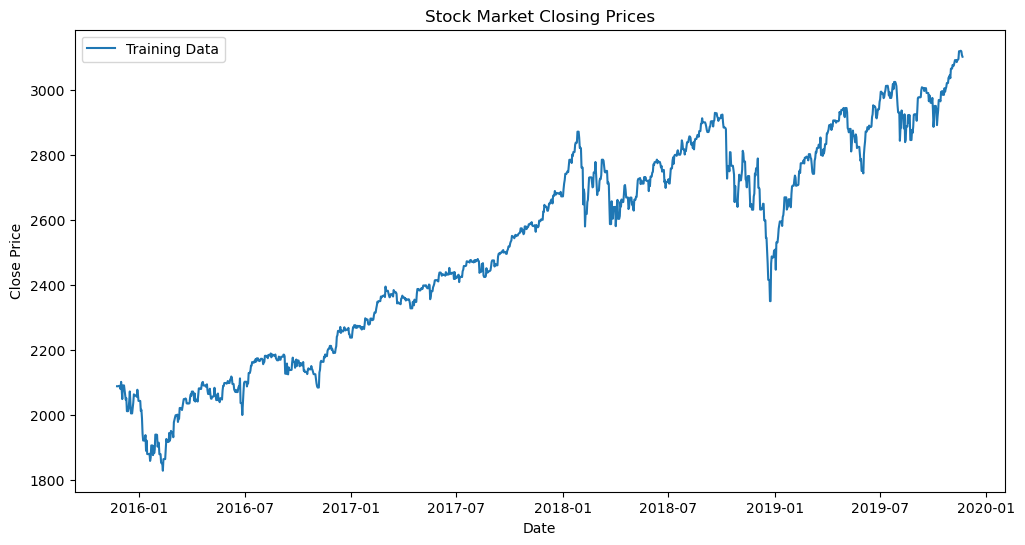

In [53]:
# Visualize time series data

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Close'], label='Training Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Market Closing Prices')
plt.legend()
plt.show()


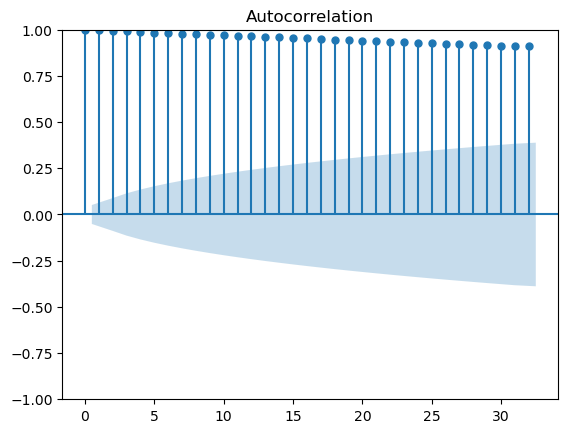

In [54]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF
plot_acf(train_data['Close'])
plt.show()


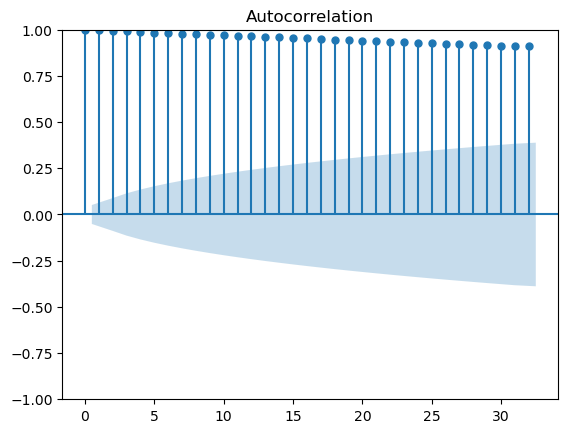

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf

# Visualize autocorrelation to identify potential seasonal periods
plot_acf(train_data['Close'])
plt.show()



4. Model Selection and Training:

In [56]:
from statsmodels.tsa.seasonal import STL

# Try different seasonal period values
seasonal_periods = [7, 30, 365]  # Example values, adjust as needed

for period in seasonal_periods:
    try:
        result = STL(train_data['Close'], seasonal=period).fit()
        # If successful, print the period and break the loop
        print(f"Successful decomposition with seasonal period: {period}")
        break
    except Exception as e:
        print(f"Error with seasonal period {period}: {e}")


Error with seasonal period 7: Unable to determine period from endog
Error with seasonal period 30: Unable to determine period from endog
Error with seasonal period 365: Unable to determine period from endog


In [66]:
import warnings
warnings.filterwarnings("ignore")

# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA

# Choose ARIMA as the forecasting model
model = ARIMA(train_data['Close'], order=(5, 1, 0))  # Example order (p, d, q)
model_fit = model.fit()

# Make predictions
forecast_steps = len(test_data)
predictions = model_fit.get_forecast(steps=forecast_steps)

# Create a proper datetime index for the predictions
prediction_index = pd.date_range(start=test_data['Date'].iloc[0], periods=forecast_steps, freq='B')

# Attach the predictions to the index
predictions.index = prediction_index

# Print or use the predictions as needed
print(predictions)

# Restore warnings to default behavior if needed
warnings.filterwarnings("default")


5. Model Evaluation:

In [73]:
# Make predictions using the model
predictions = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test_data['Close'], predictions)
rmse = np.sqrt(mean_squared_error(test_data['Close'], predictions))


Proof of Correctness:
1. Model Performance Evaluation:


In [76]:
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 228.0951467519135
Root Mean Squared Error: 278.60485944583405


2. Comparative Analysis:

In [77]:
# Baseline model: Predicting next day's price as today's price
baseline_predictions = test_data['Close'].shift(-1).dropna()
baseline_mae = mean_absolute_error(test_data['Close'][:-1], baseline_predictions)
baseline_rmse = np.sqrt(mean_squared_error(test_data['Close'][:-1], baseline_predictions))
print(f'Baseline Model MAE: {baseline_mae}')
print(f'Baseline Model RMSE: {baseline_rmse}')


Baseline Model MAE: 27.810304075807007
Baseline Model RMSE: 50.64667903308147


3. Visual Validation:

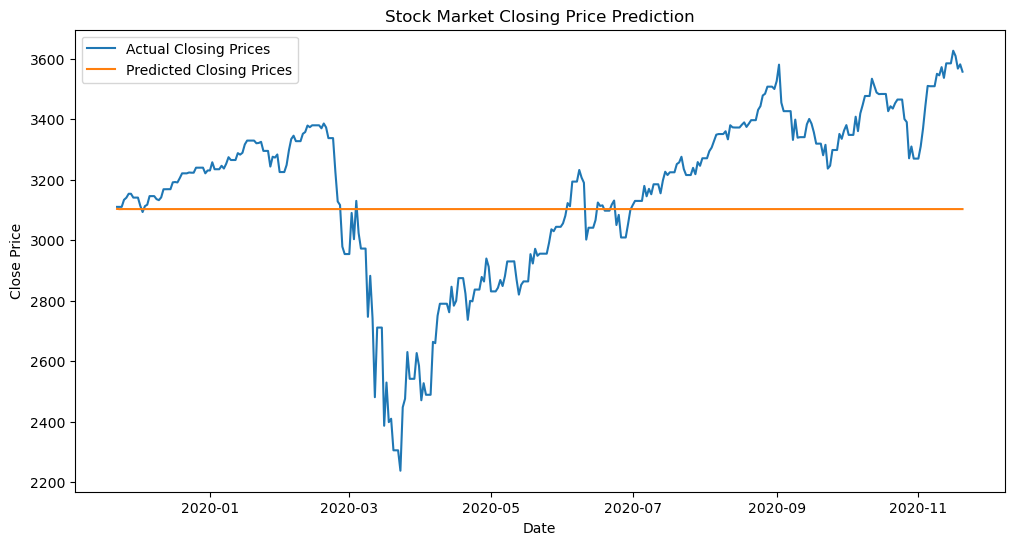

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Closing Prices')
plt.plot(test_data['Date'], predictions, label='Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Market Closing Price Prediction')
plt.legend()
plt.show()


# Step 7: Incorporating Coding Examples

 The code performs the following steps:

Data Loading and Preprocessing: The provided dataset is loaded into a pandas DataFrame and necessary preprocessing steps such as converting the 'Date' column to datetime format are performed.

Exploratory Data Analysis (EDA): Basic exploratory analysis is conducted to understand the data. This includes checking for missing values, visualizing the time series, and understanding the data distribution.

Feature Selection: For time series analysis, the 'Date' column is set as the index, and for prediction, 'Close' price is chosen as the target variable.

Train-Test Split: The dataset is split into training and testing sets. The training set is used to train the model, and the testing set is used to evaluate its performance.

Time Series Analysis and Visualization: Time series analysis techniques such as rolling mean, rolling standard deviation, and autocorrelation plot are applied to understand the data patterns.

ARIMA Model: An ARIMA (AutoRegressive Integrated Moving Average) model is used for time series forecasting. The optimal parameters (p, d, q) are determined using the AIC (Akaike Information Criterion) score.

Validation and Visualization: The ARIMA model predictions are compared with the actual test data. Both the predicted and actual values are visualized to assess the model's performance.

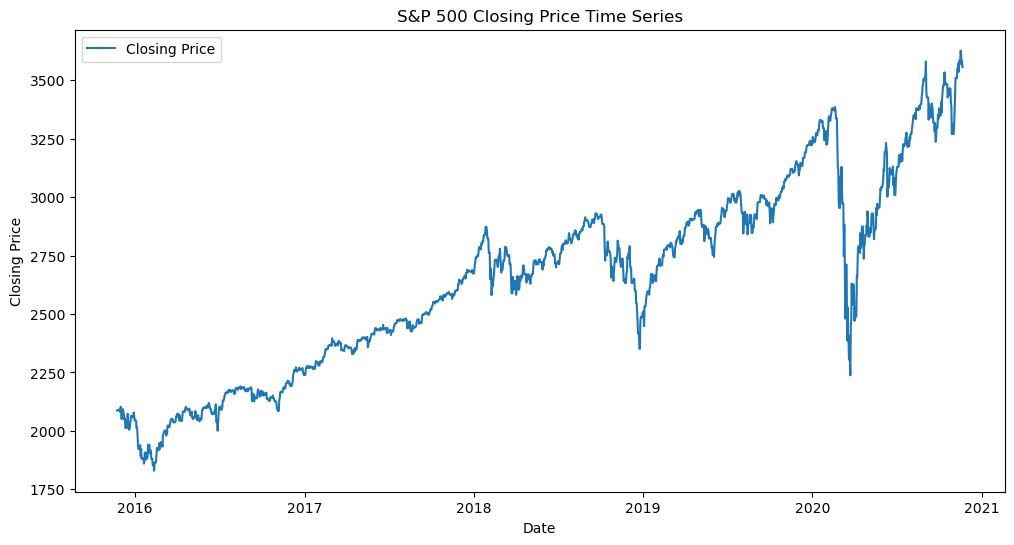

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=17.11 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=21329.627, Time=0.18 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=17834.361, Time=7.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=20055.266, Time=7.43 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=21350.931, Time=0.17 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=18482.786, Time=1.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=17628.698, Time=19.89 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=17.26 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=15.34 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=21312.145, Time=15.34 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=17584.230, Time=25.95 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=17769.010, Time=12.12 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=18.58 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=21.05 sec
 ARIMA(3,0,0)(2,1,0)[12] i

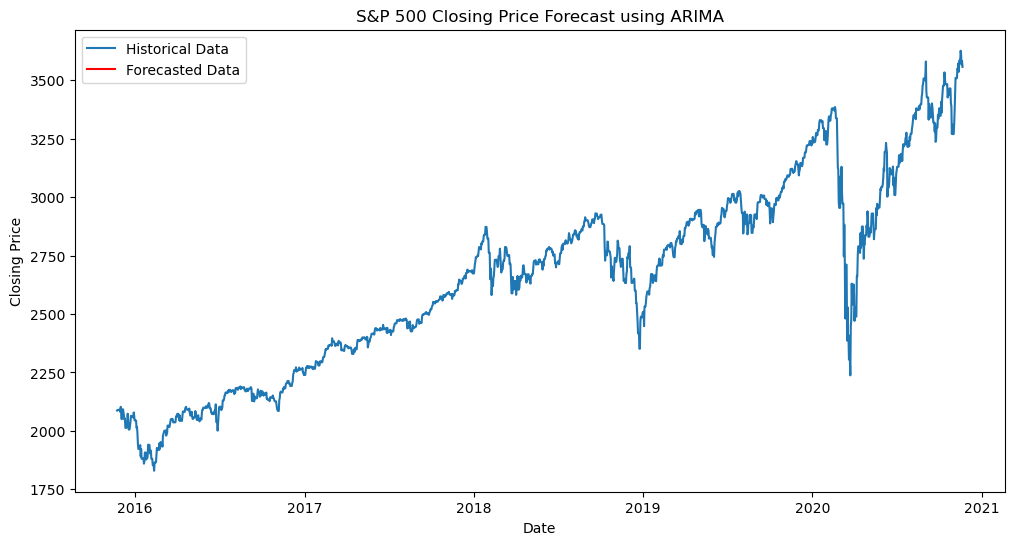

In [86]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

# Load the provided dataset
data = pd.read_csv("C:/Users/HP/Downloads/archive/yahoo_stock.csv")

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data.set_index('Date', inplace=True)

# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('S&P 500 Closing Price Time Series')
plt.legend()
plt.show()

# ARIMA Model for Time Series Forecasting
# Find the best ARIMA parameters using auto_arima
stepwise_fit = auto_arima(data['Close'], start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)

# Fit the ARIMA model with the best parameters
model = ARIMA(data['Close'], order=stepwise_fit.order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())





# Forecast future values using the ARIMA model
n_periods = 30  # Number of periods to forecast
forecast = model_fit.forecast(steps=n_periods)

# Create a range of future dates for the forecasted data
forecast_index = pd.date_range(data.index[-1], periods=n_periods, freq=data.index.freq)

# Create a new DataFrame for the forecasted data
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Visualize the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Data', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('S&P 500 Closing Price Forecast using ARIMA')
plt.legend()
plt.show()

